In [1]:
### ------------------------------------------------------------------------
### Trabalho Final  Inteligência Artificial
### Adriano G e Jean M.
### -------------------------------------------------------------------------

In [2]:
#import h1 as h1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import statistics  as sts
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
df=pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Resumo geral da base de dados

In [6]:
print ("Linhas: " , df.shape[0])
print ("Colunas: " , df.shape[1])
print ("\nAtributos : \n" , df.columns.tolist())
print ("\nValores faltantes :  ", df.isnull().sum().values.sum())
print ("\nValores únicos :  \n",df.nunique())

Linhas:  891
Colunas:  12

Atributos : 
 ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Valores faltantes :   866

Valores únicos :  
 PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


## Pré-processamento

### Remoção ID feature e verificação de dados faltantes

In [7]:
# Verifica a quantidade de dados faltrantes
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
### Substituição NAs Age pela mediana
mediana = df['Age'].median()
#preenche NAs
df['Age'].fillna(mediana, inplace=True)
df['Age'].isna().sum()

0

In [9]:
df['Embarked'].fillna('S', inplace=True)
df['Embarked'].isna().sum()

0

In [10]:
###Troca Cabines vazias pela moda
cabin_mode = df['Cabin'].mode()[0]
df['Cabin'].fillna(cabin_mode, inplace=True)
df['Cabin'].isna().sum()

0

### Carregar dados para previsao da Cabine com um treino de random forest

In [211]:
### crio uma nova variavel com as colunas relevantes para previsao
###df_cabines = df[['Pclass','Sex','Age','Fare','Cabin','Embarked']]
#df_cabines


In [212]:
### separo em cabines conhecidas e cabines desconhecidas
#df_conhecidas = df_cabines.dropna(subset=['Cabin'])
#df_desconhecidas = df_cabines[df_cabines['Cabin'].isna()]
#df_desconhecidas


In [213]:
#df_conhecidas

In [214]:
### removendo a coluna cabin para separarmos atributos e rotulos
### Separar os dados conhecidos em atributos e rótulos
#atributos_conhecidos = df_conhecidas.drop('Cabin', axis=1)
#cabines_conhecidas = df_conhecidas['Cabin']


In [215]:
### convertendo para Dummy
#atributos_conhecidos = pd.get_dummies(atributos_conhecidos)
#cabines_conhecidas = pd.get_dummies(cabines_conhecidas)


In [216]:
###treinar com o modelo random forest
#modelo = RandomForestClassifier()
#modelo.fit(atributos_conhecidos,cabines_conhecidas)

In [217]:
###prever valores faltantes na coluna cabin
#atributos_desconhecidos = df_desconhecidas.drop('Cabin',axis=1)
#atributos_desconhecidos = pd.get_dummies(atributos_desconhecidos)
#prever_cabine = modelo.predict(atributos_desconhecidos)
#prever_cabine = prever_cabine[:, 0]


#prever_cabine

In [218]:
# Criar DataFrame com as previsões codificadas
#df_previsoes = pd.DataFrame(prever_cabine, columns=[f'Cabin_{i}' for i in range(len(modelo.classes_))])

#df_previsoes_revertidas = df_previsoes.idxmax(axis=1)

#df.loc[df['Cabin'].isna(), 'Cabin'] = df_previsoes_revertidas.values





In [219]:
# Verifica a quantidade de dados faltantes
#df.isna().sum()

In [220]:
#df

##################################################################


In [11]:
df=df.drop(columns='PassengerId',axis=1)
df=df.drop(columns='Ticket',axis=1)
df=df.drop(columns='Name',axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,B96 B98,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,B96 B98,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,B96 B98,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,28.0,1,2,23.4500,B96 B98,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [12]:
df[["Survived","Sex"]].value_counts()

Survived  Sex   
0         male      468
1         female    233
          male      109
0         female     81
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df[["Survived","Sex"]] = \
df[["Survived","Sex"]].apply(labelencoder.fit_transform)

Atributos com mais de 2 valores,


In [14]:
df = pd.get_dummies(data=df, columns=['Pclass'])
df = pd.get_dummies(data=df, columns=['SibSp'])
df = pd.get_dummies(data=df, columns=['Parch'])
df = pd.get_dummies(data=df, columns=['Cabin'])
df = pd.get_dummies(data=df, columns=['Embarked'])


In [15]:
df.columns

Index(['Survived', 'Sex', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'SibSp_0', 'SibSp_1', 'SibSp_2',
       ...
       'Cabin_F G73', 'Cabin_F2', 'Cabin_F33', 'Cabin_F38', 'Cabin_F4',
       'Cabin_G6', 'Cabin_T', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=171)

In [16]:
std=StandardScaler()
columns = ['Age','Fare']
scaled = std.fit_transform(df[['Age','Fare']])
scaled = pd.DataFrame(scaled,columns=columns)
df=df.drop(columns=columns,axis=1)

In [17]:
df=df.merge(scaled, left_index=True, right_index=True, how = "right")
df

,Survived,Sex,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Age,Fare
0,0,1,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,True,-0.565736,-0.502445
1,1,0,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,0.663861,0.786845
2,1,0,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,True,-0.258337,-0.488854
3,1,0,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,0.433312,0.420730
4,0,1,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,True,0.433312,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,-0.181487,-0.386671
887,1,0,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,-0.796286,-0.044381
888,0,0,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,True,-0.104637,-0.176263
889,1,1,True,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,-0.258337,-0.044381


### Separação entre treino e teste (70% e 30%)

In [18]:
X = df.drop(['Survived'], axis=1).values
y = df['Survived'].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

###Aplica balanceamento nas classes

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
sm = SMOTE()
x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

In [22]:
print(x_train_oversampled.shape)
print(X_train.shape)

(772, 170)
(623, 170)


### KNN Classifier

In [23]:
df.columns

Index(['Survived', 'Sex', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       ...
       'Cabin_F33', 'Cabin_F38', 'Cabin_F4', 'Cabin_G6', 'Cabin_T',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age', 'Fare'],
      dtype='object', length=171)

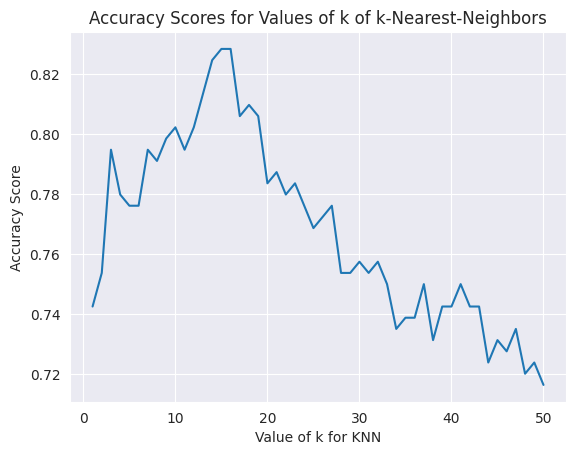

In [28]:
# Teste para diferentes valores de k
k_range = list(range(1,51))
scores = []
for k in k_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)
    knn = KNeighborsClassifier(n_neighbors=k,metric = 'euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [34]:
## Normalização dos dados

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(623, 170)
(623,)
(268, 170)
(268,)


In [35]:
X_train

array([[0, False, False, ..., True, -0.10463740114712752,
        -0.32425318983493084],
       [1, False, True, ..., True, -0.2583370877897099,
        -0.43700743807979686],
       [0, True, False, ..., True, -0.5657364610748746,
        2.4029901895877646],
       ...,
       [1, False, True, ..., False, -0.027787557825836348,
        -0.09027201697708476],
       [1, False, True, ..., True, -2.1027333275006983,
        -0.12491978668775715],
       [1, False, False, ..., True, -0.10463740114712752,
        -0.2463983948905696]], dtype=object)

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
X_train

array([[-1.32079271, -0.59279843, -0.52098807, ...,  0.63245553,
        -0.14762916, -0.33963155],
       [ 0.75712108, -0.59279843,  1.91942974, ...,  0.63245553,
        -0.29626272, -0.44159032],
       [-1.32079271,  1.68691405, -0.52098807, ...,  0.63245553,
        -0.59352985,  2.12649611],
       ...,
       [ 0.75712108, -0.59279843,  1.91942974, ..., -1.58113883,
        -0.07331237, -0.12805254],
       [ 0.75712108, -0.59279843,  1.91942974, ...,  0.63245553,
        -2.0798655 , -0.15938302],
       [ 0.75712108, -0.59279843, -0.52098807, ...,  0.63245553,
        -0.14762916, -0.26923084]])

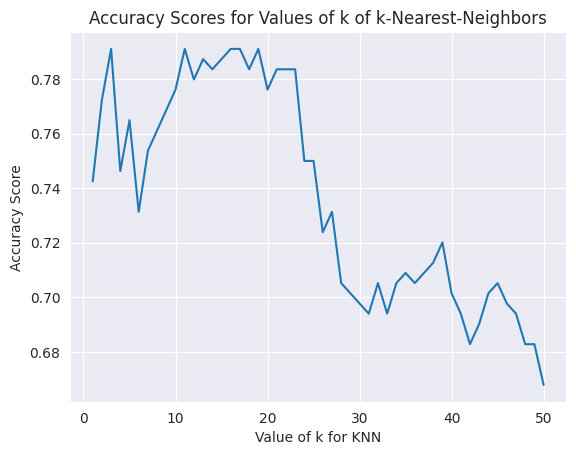

In [39]:
# experimenting with different n values
k_range = list(range(1,51))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

<h1 style="font-family:Georgia;font-size:175%;text-align:left">Random Forest Classifier</h1>

In [40]:
forest = RandomForestClassifier()

param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_features':['sqrt','log2'],
              'n_estimators': [10, 20, 30, 60]}

In [41]:
# cria o objeto g_search
g_search = GridSearchCV(estimator = forest, param_grid = param_grid,
                        refit=True, scoring='accuracy', cv = 10)

In [42]:
# Faz o treinamento
g_search.fit(x_train_oversampled, y_train_oversampled);
print(g_search.best_params_)

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 60}


In [43]:
# Carrega todos os dados do GridSearch em um Dataframe
g_results =  pd.DataFrame(g_search.cv_results_)
# Nome de todos atributos gerados pelo GridSearch
g_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_features', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [44]:
# Obtém a média das acurácias (10 folds) referente ao conjunto treino
g_results.loc[g_search.best_index_,'mean_test_score']

0.8654179154179154

In [45]:
# Avalia o conjunto teste  com o melhor conjunto de parâmetros encontrado
# best_estimator_ .Para tanto, o parâmetro refit precisa ser igual a True
model = g_search.best_estimator_
model.score(X_test,y_test)

0.44776119402985076

Amostragem por validação cruzada estratificada

In [46]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier


In [47]:
model = RandomForestClassifier()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=skf)
mean_score = scores.mean()
mean_score

0.80019975031211

In [48]:
train_scores = cross_val_score(model, X_train, y_train, cv=skf)
mean_train_accuracy = train_scores.mean()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_accuracy

0.8171641791044776

Redes Neurais?

In [81]:
from sklearn.neural_network import MLPClassifier

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)
rna = MLPClassifier(hidden_layer_sizes=(10,10, 10), activation='relu', solver='sgd', max_iter =800,
                              tol=0.0001, random_state = 3, verbose = True)
rna.fit(X_train, y_train)


Iteration 1, loss = 0.67145487
Iteration 2, loss = 0.67099706
Iteration 3, loss = 0.67027239
Iteration 4, loss = 0.66925550
Iteration 5, loss = 0.66799033
Iteration 6, loss = 0.66655698
Iteration 7, loss = 0.66518815
Iteration 8, loss = 0.66382538
Iteration 9, loss = 0.66256233
Iteration 10, loss = 0.66124234
Iteration 11, loss = 0.65983154
Iteration 12, loss = 0.65824093
Iteration 13, loss = 0.65671758
Iteration 14, loss = 0.65526609
Iteration 15, loss = 0.65380661
Iteration 16, loss = 0.65260234
Iteration 17, loss = 0.65143065
Iteration 18, loss = 0.65032130
Iteration 19, loss = 0.64942780
Iteration 20, loss = 0.64850545
Iteration 21, loss = 0.64776365
Iteration 22, loss = 0.64708682
Iteration 23, loss = 0.64643215
Iteration 24, loss = 0.64579651
Iteration 25, loss = 0.64511742
Iteration 26, loss = 0.64448010
Iteration 27, loss = 0.64376328
Iteration 28, loss = 0.64308842
Iteration 29, loss = 0.64248080
Iteration 30, loss = 0.64182538
Iteration 31, loss = 0.64119216
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=800, random_state=3,
              solver='sgd', verbose=True)

In [83]:
previsoes = rna.predict(X_test)
previsoes

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1])

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [85]:
print("Acurácia: %.2f%%" % (accuracy_score(y_test, previsoes) * 100.0))

Acurácia: 81.34%


In [86]:
confusion_matrix(y_test, previsoes)

array([[148,  20],
       [ 30,  70]])

In [87]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       168
           1       0.78      0.70      0.74       100

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



In [88]:
previsoes_treino = rna.predict(X_train)
previsoes_treino

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,

In [89]:
accuracy_score(y_train, previsoes_treino)


0.8346709470304976

In [90]:
unique_classes_y = np.unique(y)
unique_classes_previsoes = np.unique(previsoes)
print("Classes em y:", unique_classes_y)
print("Classes em previsoes:", unique_classes_previsoes)

Classes em y: [0 1]
Classes em previsoes: [0 1]


############################################################################

In [91]:
forest = RandomForestClassifier(random_state=42)
#==
forest.fit(x_train_oversampled, y_train_oversampled)
#==
#Score
#==
forest_score = forest.score(x_train_oversampled, y_train_oversampled)
forest_test = forest.score(X_test, y_test)
#==
#testing model
#==
y_pred = forest.predict(X_test)
#==
#evaluation
#==
cm = confusion_matrix(y_test,y_pred)
print('Training Score',forest_score)
print('Testing Score \n',forest_test)
print(cm)

Training Score 0.989501312335958
Testing Score 
 0.8059701492537313
[[143  25]
 [ 27  73]]


###################################################################################################################################################

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
# param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
#               'max_features':['sqrt','log2'],
#               'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 100, 200, 300]}
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_features':['sqrt','log2'],
              'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 100, 200, 300]}
#### Exemplo com GridSearchCV
# - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
g_search = GridSearchCV(estimator=forest, param_grid=param_grid,
                        cv=10, return_train_score=True)
sm = SMOTE()
x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
print(np.unique(y_train_oversampled, return_counts=True))
g_search.fit(x_train_oversampled, y_train_oversampled)
print(g_search.best_params_)
print(g_search.best_score_)

(array([0, 1]), array([381, 381]))
{'criterion': 'log_loss', 'max_features': 'log2', 'n_estimators': 30}
0.8464969241285031


In [93]:
### **Validação Cruzada**

In [94]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

rna = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter =800,
                              tol=0.0001, random_state = 3)


for train_index, test_index in skf.split(X_train, y_train):
    x_train_fold, x_test_fold = previsoes[train_index], previsoes_treino[test_index]
    y_train_fold, y_test_fold = alvo[train_index], alvo[test_index]
    rna.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(rna.score(x_test_fold, y_test_fold))

# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

IndexError: index 268 is out of bounds for axis 0 with size 268